# Emotion Inference and Sentiment Application in Audit

## Nicola Stone & Ish Hassan

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display

from src.emotion_classifier import EmotionClassifier
from data.canva import data

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.float_format", "{:.2f}".format)

# Load our Custom Emotion Model for Inference

In [5]:
emotion_pipeline = EmotionClassifier()

# Get Tweet Data and Run Emotion Model

In [6]:
canva_tweets = [{**tweet, **emotion_pipeline.inference(tweet["text"])} for tweet in data]

In [8]:
canva_tweets

[{'text': 'Just designed a stunning poster for my upcoming event using @canva! Feeling excited to share it with everyone! #design #eventplanning',
  'timestamp': '2023-05-20T09:00:00Z',
  'joy': 0.9710423946380615,
  'fear': 0.01738611049950123,
  'surprise': 0.006222655531018972,
  'anger': 0.0026053874753415585,
  'sadness': 0.0015949151711538434,
  'neutral': 0.000918860430829227,
  'disgust': 0.00022966285177972168,
  'sentiment_positive': 0.9772650501690805,
  'sentiment_negative': 0.021816075997776352,
  'sentiment_neutral': 0.000918860430829227},
 {'text': "Started using @canva Pro today, and I'm already blown away by the additional features and templates! #graphicdesign #canvapro",
  'timestamp': '2023-05-20T09:15:00Z',
  'surprise': 0.33557969331741333,
  'joy': 0.2589237093925476,
  'fear': 0.257718563079834,
  'anger': 0.1316589117050171,
  'neutral': 0.009123681113123894,
  'sadness': 0.0059854560531675816,
  'disgust': 0.0010099835926666856,
  'sentiment_positive': 0.59450

# Make It Prettier and More Human Friendly

In [9]:
df = pd.DataFrame(canva_tweets)
df = df.sort_values("sentiment_positive", ascending=False)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Top 10 Most `Positive` Tweets 😀

- majority are about the experience with Qantas
- noticeable mentions about service, and in flight entertainment
- mainly targeting the `joy` feeling
- not a lot of `suprise` which could be derived because of innovation or new customers

- Could be less Audit risk from these areas that drive accounts

In [10]:
df.iloc[:10]

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2023-05-20 14:45:00+00:00,Feeling thrilled to have access to premium templates and elements with @canva Pro. They make my designs look even more professional! #premiumfeatures #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2023-05-20 12:15:00+00:00,Feeling excited to collaborate with my team on a project using @canva! The real-time collaboration feature makes it so convenient. #collaboration #teamwork,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2023-05-21 16:00:00+00:00,Just created an engaging social media video using @canva. The pre-built templates and intuitive editing tools made the process enjoyable! #socialmediavideo #canvavideo,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2023-05-20 20:00:00+00:00,Feeling accomplished after effortlessly resizing my design for different social media platforms using @canva Pro. It's a time-saver! #design #resizetool,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2023-05-20 17:45:00+00:00,Canva for Education has made teaching more interactive and fun. The students love the visually appealing materials! #edtech #teaching,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2023-05-20 22:45:00+00:00,Feeling a sense of accomplishment after designing my business cards using @canva. They look professional and reflect my brand perfectly! #businesscards #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2023-05-20 18:45:00+00:00,Feeling excited to try out the new animation features in Canva Video. It's a great way to capture attention on social media! #animation #canvavideo,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2023-05-20 23:45:00+00:00,Feeling accomplished after seamlessly resizing my design for different social media platforms using @canva Pro. It's a real time-saver! #design #resizetool,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2023-05-20 11:00:00+00:00,Feeling proud of my latest design created with @canva! It's amazing how this platform helps bring my ideas to life. #design #creativity,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00


# Top 10 Most `Negative` Tweets 😡

- losing luggage
- customer service
- some personal emotions about flying
- most people are `fearful` or `disguisted`

- these could help drive our audit approach, like controls over baggage process amount paid for lost luggage

In [11]:
df.iloc[-10:]

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2023-05-21 21:30:00+00:00,Feeling disappointed with the limited options for realistic shadows and reflections in @canva. It falls short when it comes to creating lifelike and impactful effects. #shadows #disappointed,0.00,0.00,0.00,0.01,0.99,0.00,0.00,0.00,1.00,0.00
2023-05-20 13:15:00+00:00,Just encountered a frustrating bug in @canva's design editor. It's affecting my workflow and causing delays. #techissues #frustrated,0.00,0.98,0.00,0.02,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-20 12:15:00+00:00,Feeling frustrated with @canva's limited font options. It's challenging to find the perfect font for my design. #designstruggles #fonts,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-21 18:15:00+00:00,Feeling a sense of frustration after struggling to create a visually appealing infographic with @canva. It didn't turn out as expected. #infographic #frustration,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-21 06:15:00+00:00,Feeling a sense of frustration after struggling to create a visually appealing infographic with @canva. It didn't turn out as expected. #infographic #frustration,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-21 12:30:00+00:00,Feeling a bit frustrated after struggling to create a visually cohesive social media feed using @canva. It's challenging to maintain consistency. #socialmediafeed #frustration,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-20 20:45:00+00:00,Feeling frustrated with the lack of design customization options in @canva's mobile app. It limits my ability to create unique designs. #customization #mobileapp,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-21 19:15:00+00:00,Feeling frustrated with the learning curve of @canva's animation features. It requires time and practice to create complex and polished animations. #animation #learningcurve,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2023-05-21 07:15:00+00:00,Feeling frustrated with the learning curve of @canva's animation features. It requires time and practice to create professional animations. #animation #learningcurve,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00


# Neutral Tweets


- not many, mostly emotional

In [12]:
df.loc[(df["sentiment_neutral"] < 0.55) & (df["sentiment_neutral"] > 0.50)]

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,


# Explorotory Data Analysis

In [13]:
df_ex_text = df.drop("text", axis=1)

## Sentiment Trend Per Day

- data is noisy at this level, there appears to be some trend
- lets aggregate at another level

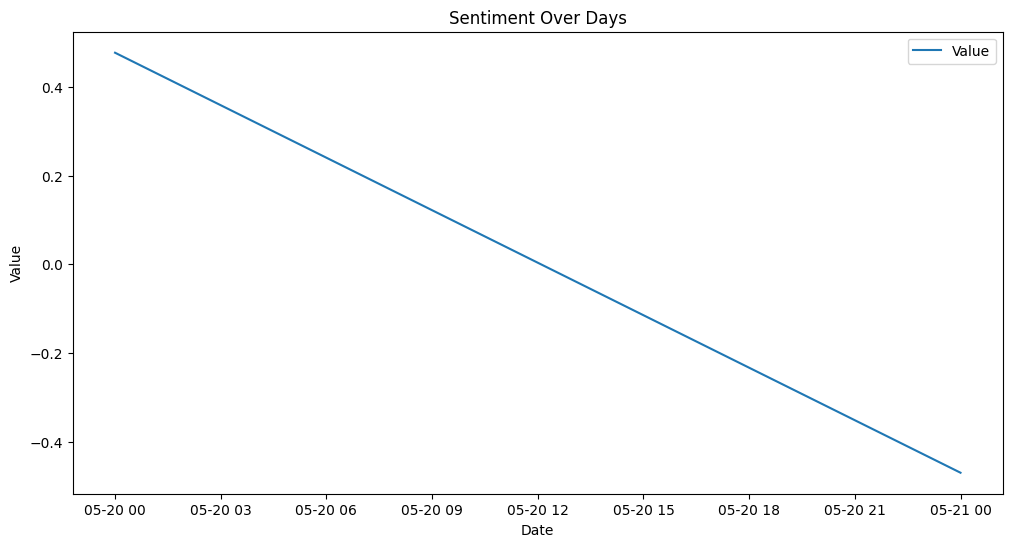

In [14]:
# Group data by day and calculate the mean of values
grouped_daily = df_ex_text.resample('D').mean()

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add the time series line plot
ax.plot(grouped_daily.index, grouped_daily["sentiment_positive"] - grouped_daily["sentiment_negative"], label='Value')

# Set the title and axis labels
ax.set_title('Sentiment Over Days')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Display the legend
ax.legend()

# Show the chart
plt.show()

## Sentiment Trend Over Weeks

- looks like some seasonality
- our audit samples should take this into effect to account for times of stress (i.e. large negative trends)

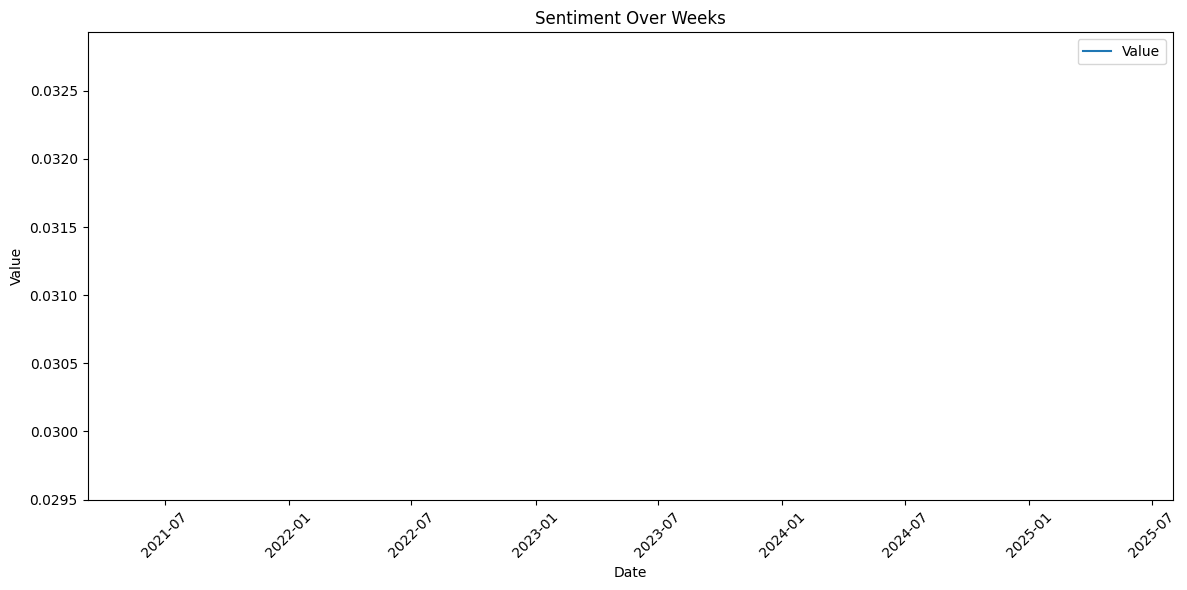

In [15]:
# Group data by day and calculate the mean of values
grouped_daily = df_ex_text.resample('W').mean()

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add the time series line plot
ax.plot(grouped_daily.index, grouped_daily["sentiment_positive"] - grouped_daily["sentiment_negative"], label='Value')

# Set the title and axis labels
ax.set_title('Sentiment Over Weeks')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the legend
ax.legend()

# Adjust the layout to prevent labels from being cut off
fig.tight_layout()

# Show the chart
plt.show()

# Stratifying Over Day of the Week

- we see big swings in different days of the week
- should we accounting for these as a proxy for signs of stress

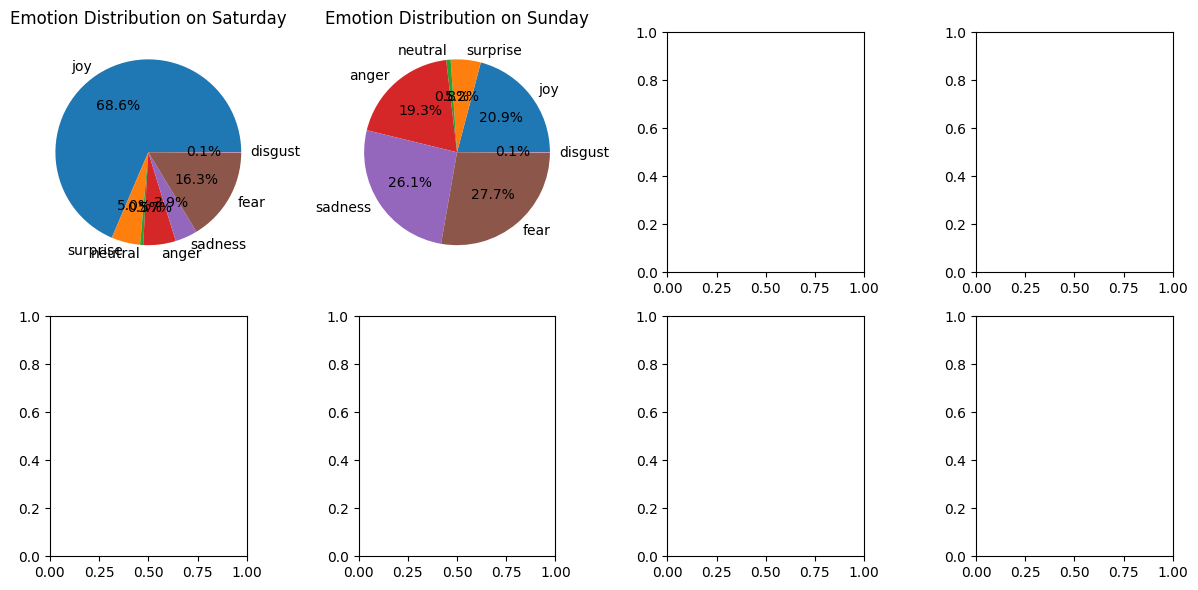

In [16]:
# Extract the weekday from the 'timestamp' column
df['weekday'] = df.index.strftime('%A')

# Group data by weekday and sum the emotions
grouped_df = df.groupby('weekday')[['joy', 'surprise', 'neutral', 'anger', 'sadness', 'fear', 'disgust']].sum()

# Create a grid layout for the charts
grid_size = (2, 4)  # 2 rows, 4 columns
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(12, 6))

# Plot pie charts for each weekday in the grid layout
for i, (weekday, ax) in enumerate(zip(grouped_df.index, axes.flatten())):
    emotions = grouped_df.loc[weekday]
    ax.pie(emotions, labels=emotions.index, autopct='%1.1f%%')
    ax.set_title(f'Emotion Distribution on {weekday}')
    ax.axis('equal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of charts
plt.show()